<a href="https://colab.research.google.com/github/DaverArenas/DataAnalytics_Text/blob/main/DA_ScrapingTwitter_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


In [ ]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

##Biblioteca para extraer tuits

In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import pandas as pd
from datetime import date

In [4]:
today = date.today()
end_date = today
end_date

datetime.date(2022, 8, 2)

In [5]:
today

datetime.date(2022, 8, 2)

In [6]:
search = 'covid-19'
from_date = '2019-01-01'

In [7]:
os.system(f"snscrape --since {from_date} twitter-search '{search} until:{end_date}' > result-tweets.txt")

2

In [8]:
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 10346


In [9]:
##Este dataframe nos trae los links, necesitamos las cadenas de texto
df

,link
0,https://twitter.com/Mercer_INV/status/15542556...
1,https://twitter.com/OANN/status/15542556389637...
2,https://twitter.com/CancerCenter/status/155425...
3,https://twitter.com/Axiom343/status/1554255632...
4,https://twitter.com/COVID19arXiv/status/155425...
...,...
10341,https://twitter.com/kewsht66/status/1554159550...
10342,https://twitter.com/JGTCOnline/status/15541595...
10343,https://twitter.com/doutorcury/status/15541595...
10344,https://twitter.com/SoonBWasted/status/1554159...


## Extraer tweets

In [11]:
##Ponemos un valor máximo de tuits y definimos desde que fecha queremos extraer los tuits
max_results=1000
from_date = '2022-01-01'

In [12]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(("'After an unprecedented #recession driven by the #COVID19 crisis", ' economies have recovered aggressively. But that recovery has outpaced capacity &amp; combined with supply chain disruptions', ' high commodity prices &amp; tight labor #markets'), " has ignited #inflation. https://t.co/e9e8bAKU68 https://t.co/kNKRG1x2Kc'")
(("'GOP Sen. John Cornyn positive for COVID-19 - https://t.co/CL4eeL4y2H #OANN'", nan, nan), nan)
(("'COVID-19 still poses a threat to cancer patients and others who have compromised immune systems. And the BA.5 subvariant is proving to be highly contagious. What to know: https://t.co/5mz6YIb0ko'", nan, nan), nan)
(("'Well shit", " good thing SDCC was strict on COVID-19 regulations. https://t.co/PiBiMyJpFF'", nan), nan)
(("'𝗧𝗶𝘁𝗹𝗲: Epitranscriptomic N6-methyladenosine profile of SARS-CoV-2-infected human lung epithelial cells.\\n𝗔𝘂𝘁𝗵𝗼𝗿𝘀: Stacia Phillips", ' Shaubhagya Khadka', ' Dana Bohan'), ' Constanza E. Espada')
(("'@CapitalTorker #COVID19 The reason the spike

In [13]:
df

,,,content
'After an unprecedented #recession driven by the #COVID19 crisis,economies have recovered aggressively. But that recovery has outpaced capacity &amp; combined with supply chain disruptions,high commodity prices &amp; tight labor #markets,has ignited #inflation. https://t.co/e9e8bAKU...
'GOP Sen. John Cornyn positive for COVID-19 - https://t.co/CL4eeL4y2H #OANN',NaN,NaN,NaN
'COVID-19 still poses a threat to cancer patients and others who have compromised immune systems. And the BA.5 subvariant is proving to be highly contagious. What to know: https://t.co/5mz6YIb0ko',NaN,NaN,NaN
'Well shit,good thing SDCC was strict on COVID-19 regulations. https://t.co/PiBiMyJpFF',NaN,NaN
'𝗧𝗶𝘁𝗹𝗲: Epitranscriptomic N6-methyladenosine profile of SARS-CoV-2-infected human lung epithelial cells.\n𝗔𝘂𝘁𝗵𝗼𝗿𝘀: Stacia Phillips,Shaubhagya Khadka,Dana Bohan,Constanza E. Espada
...,...,...,...
'Υψηλότερος ο κίνδυνος μακροχρόνιας Covid-19 για όσους νόσησαν δύο φορές,λένε οι\xa0ειδικοί https://t.co/rZxvlPLFXu',NaN,NaN
'미래가 장밋빛인지 암흑인지는 변화에 어떻게 대응하느냐에 따라 달라진다. 박 대표는 인터뷰 과정에서 ‘다 같지 죽고 말자는 생각은 잘못이다’ ‘이렇게 공멸할 수는 없다’고 말하며,끊임없이 해법을 모색하 ##생존의비밀 #Covid19',NaN,NaN
"'@TatianaVentose 1/2 Et encore s\'agit il ici d\'une étude de phase 1 en prophylaxie ""Maraviroc in Patients With Moderate and Severe COVID-19"" sur une population de 9 patients.\nJe n\'ai trouvé aucune trace non plus sur le site du CDC. Les autres études sont 1 au Mexique",les deux autres',NaN,NaN
'Secretaría de Salud confirma 952 casos de Covid-19 y 15 defunciones https://t.co/2MDYCBLBjP',NaN,NaN,NaN


## Usar función TwitterSearchScraper para una búsqueda avanzada

Ver: https://github.com/igorbrigadir/twitter-advanced-search para más detalle de cómo hacer la consulta

In [14]:
import snscrape.modules.twitter as sntwitter
import itertools
import os
import pandas as pd
from datetime import date

In [15]:
search = 'covid-19'

In [16]:
scraped_tweets = sntwitter.TwitterSearchScraper(search).get_items()

In [17]:
scraped_tweets

<generator object TwitterSearchScraper.get_items at 0x7f67a4fe7250>

In [18]:
sliced_scraped_tweets = itertools.islice(scraped_tweets, 2000)

In [19]:
df=pd.DataFrame(sliced_scraped_tweets)
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/G0PE7n3UEe4XnCj/status/155...,2022-08-02 23:10:18+00:00,ロシアで世界最初にCovid-19の死体を解剖し、徹底的な調査の結果、Covid-19はウイ...,1554605539971047424,G0PE7n3UEe4XnCj,[http://www.kanekashi.com/blog/2021/05/8303.ht...,http://www.kanekashi.com/blog/2021/05/8303.htm...,[https://t.co/Ptu2YOD7DP],https://t.co/Ptu2YOD7DP
1,https://twitter.com/miami_diario/status/155460...,2022-08-02 23:10:15+00:00,¡Atención! Estas son las vacunas con mayor pro...,1554605527438704642,miami_diario,[https://bit.ly/3uWXNdW],https://bit.ly/3uWXNdW,[https://t.co/UBWl5be8Pw],https://t.co/UBWl5be8Pw
2,https://twitter.com/vgclements1/status/1554605...,2022-08-02 23:10:11+00:00,THE WHO &amp; VAXXINE AGENDA 2030. \nThe goal ...,1554605510803980290,vgclements1,[https://www.who.int/teams/immunization-vaccin...,https://www.who.int/teams/immunization-vaccine...,[https://t.co/J8hXMPmikT],https://t.co/J8hXMPmikT
3,https://twitter.com/GlblCtznImpact/status/1554...,2022-08-02 23:10:08+00:00,.@UnstoppableYUVA in 🇮🇳 pledged to help 400K s...,1554605496044331010,GlblCtznImpact,[https://yuvaunstoppable.org/],https://yuvaunstoppable.org/,[https://t.co/cKJL2h2QUE],https://t.co/cKJL2h2QUE
4,https://twitter.com/AichiCovid19/status/155460...,2022-08-02 23:10:08+00:00,[更新]現在の愛知県の新型コロナワクチンの総接種回数は16467852回(1回目接種6022...,1554605496010784769,AichiCovid19,[https://www.kantei.go.jp/jp/headline/kansensh...,https://www.kantei.go.jp/jp/headline/kansensho...,[https://t.co/WrxRRYET47],https://t.co/WrxRRYET47
...,...,...,...,...,...,...,...,...,...
1995,https://twitter.com/ElizPonce3/status/15545847...,2022-08-02 21:47:52+00:00,"👀‼️Nunca fue una «pandemia de no vacunados», l...",1554584796499771396,ElizPonce3,[https://trikooba.blog/60508.html],https://trikooba.blog/60508.html,[https://t.co/FxUELx2505],https://t.co/FxUELx2505
1996,https://twitter.com/JAcaliforniaUSA/status/155...,2022-08-02 21:47:49+00:00,@RepMcEachin Shirley Graves was suffering from...,1554584783027568640,JAcaliforniaUSA,[https://ottawacitizen.com/news/local-news/she...,https://ottawacitizen.com/news/local-news/she-...,[https://t.co/kW53NRKmF2],https://t.co/kW53NRKmF2
1997,https://twitter.com/NjbBari3/status/1554584781...,2022-08-02 21:47:49+00:00,@abcnews radio going with the delayed “payback...,1554584781114863622,NjbBari3,[],,[],
1998,https://twitter.com/MnPhifer/status/1554584765...,2022-08-02 21:47:45+00:00,@JoeBiden My President wasn't too old to kill ...,1554584765080256512,MnPhifer,[],,[],


In [20]:
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

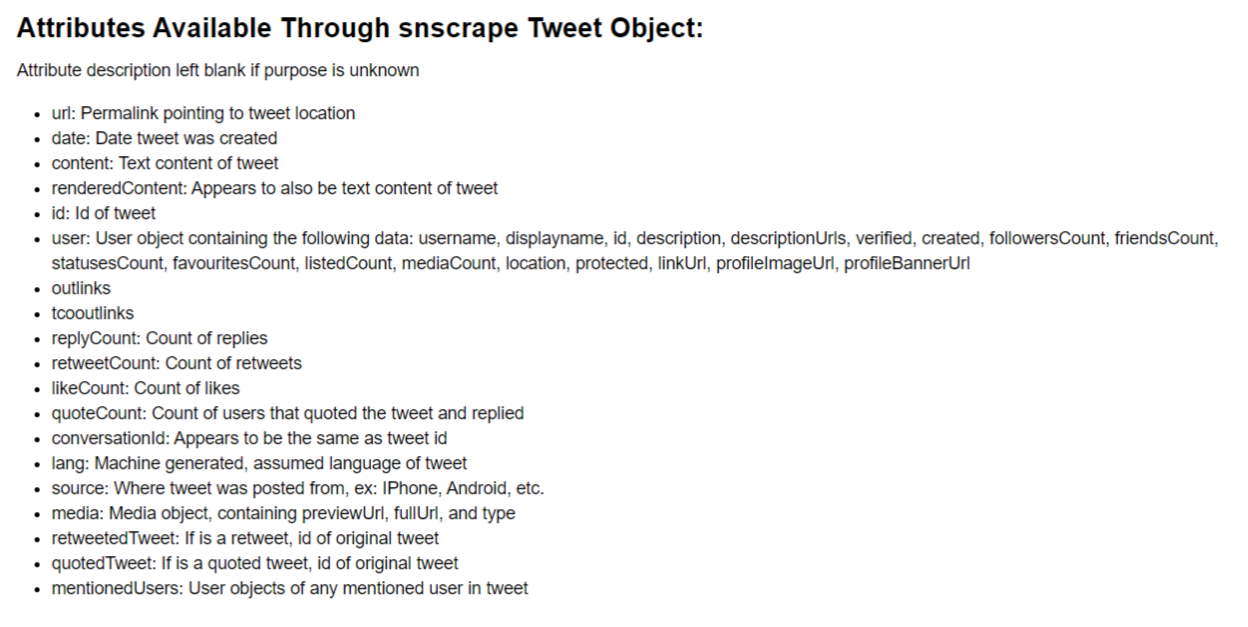

In [21]:
##filter:hashtags esta obligando a que filtre la busqueda que tenga algún tipo de hashtag
list1 = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('covid lang:es filter:hashtags').get_items()):
  if i > 100:
    break
  list1.append([tweet.date, tweet.id, tweet.content, tweet.username])

In [22]:
df_1=pd.DataFrame(list1,columns=['Datetime', 'Tweet_id', 'Text', 'Username'])

In [23]:
df_1

,Datetime,Tweet_id,Text,Username
0,2022-08-02 23:17:57+00:00,1554607463265173506,Me dio covid casi a inicios de año y cero dosi...,_Nexus6_
1,2022-08-02 23:17:39+00:00,1554607388119994368,#ÚLTIMAHORA 🚨 Quinta ola de COVID en México: S...,ElFinanciero_Mx
2,2022-08-02 23:17:28+00:00,1554607344159531009,#CirculaEnRedes / La Jornada de Vacunación con...,LoCircula
3,2022-08-02 23:17:27+00:00,1554607340678266880,#Oaxaca- Informe semanal sobre la situación po...,Oaxaca_Digital
4,2022-08-02 23:15:45+00:00,1554606909486923776,@AliciaOrtegah Después de esos momentos tan di...,dianacsoler05
...,...,...,...,...
96,2022-08-02 22:36:58+00:00,1554597150377508864,#De Interés||Gracias a nuestra Directora Gener...,inmobiliariana_
97,2022-08-02 22:36:25+00:00,1554597011848134659,#Coronavirus | Solo el 16 % de los venezolanos...,FraseSimple
98,2022-08-02 22:35:14+00:00,1554596713175941121,La Covid-19 en #Cuba al cierre del 1 de agosto...,RadioRelojCuba
99,2022-08-02 22:35:09+00:00,1554596694842646528,—🎦 MOMENTOS HOBIPALOOZA \n\nPor fin tuvimos la...,ON_BTS1


In [24]:
df_covid_en = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('covid lang:en').get_items(), 50))
df_covid_en

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/CABirdGirl2/status/1554608...,2022-08-02 23:20:29+00:00,@sarahbeth345 How many small businesses closed...,1554608103777345536,CABirdGirl2,[],,[],
1,https://twitter.com/jayhousecomics/status/1554...,2022-08-02 23:20:29+00:00,It’s just getting crazier isn’t it. 🤣🤣🤣\nNew v...,1554608100728004609,jayhousecomics,[https://youtu.be/5HshiHl3lDI],https://youtu.be/5HshiHl3lDI,[https://t.co/mlLeKznkHJ],https://t.co/mlLeKznkHJ
2,https://twitter.com/GINGERRPPL/status/15546080...,2022-08-02 23:20:28+00:00,@covid_parent And what about Baaaa White? http...,1554608099184369664,GINGERRPPL,[],,[],
3,https://twitter.com/TravelsByTrike/status/1554...,2022-08-02 23:20:28+00:00,@chipfranklin yes. I'm expecting to get Covid ...,1554608097049694208,TravelsByTrike,[],,[],
4,https://twitter.com/FrankJRanelli/status/15546...,2022-08-02 23:20:26+00:00,@JReinerMD 300 million Americans are dying for...,1554608090728878080,FrankJRanelli,[],,[],
5,https://twitter.com/2LeThiccc2Quit/status/1554...,2022-08-02 23:20:22+00:00,@Lappolill @SheerOpulence2 Question for you. I...,1554608071929888769,2LeThiccc2Quit,[],,[],
6,https://twitter.com/TheBeach2018/status/155460...,2022-08-02 23:20:22+00:00,@RonFilipkowski We will be reading that he has...,1554608071908941825,TheBeach2018,[],,[],
7,https://twitter.com/LostScarf/status/155460807...,2022-08-02 23:20:21+00:00,@Misty_Lake @Steam appears it went down just a...,1554608070205980672,LostScarf,[],,[],
8,https://twitter.com/godhall11/status/155460806...,2022-08-02 23:20:20+00:00,Jar Jar Joe will be locked up in the White Hou...,1554608063646052352,godhall11,[],,[],
9,https://twitter.com/RealCrismic/status/1554608...,2022-08-02 23:20:18+00:00,Wonder if they are going to postpone CDL champ...,1554608055697911809,RealCrismic,[],,[],


In [25]:
##agregamos una columna donde especificamos en que idioma estan los tuits
df_covid_en["Language"]="en"

In [26]:
df_covid_en.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,Language
0,https://twitter.com/CABirdGirl2/status/1554608...,2022-08-02 23:20:29+00:00,@sarahbeth345 How many small businesses closed...,1554608103777345536,CABirdGirl2,[],,[],,en
1,https://twitter.com/jayhousecomics/status/1554...,2022-08-02 23:20:29+00:00,It’s just getting crazier isn’t it. 🤣🤣🤣\nNew v...,1554608100728004609,jayhousecomics,[https://youtu.be/5HshiHl3lDI],https://youtu.be/5HshiHl3lDI,[https://t.co/mlLeKznkHJ],https://t.co/mlLeKznkHJ,en
2,https://twitter.com/GINGERRPPL/status/15546080...,2022-08-02 23:20:28+00:00,@covid_parent And what about Baaaa White? http...,1554608099184369664,GINGERRPPL,[],,[],,en
3,https://twitter.com/TravelsByTrike/status/1554...,2022-08-02 23:20:28+00:00,@chipfranklin yes. I'm expecting to get Covid ...,1554608097049694208,TravelsByTrike,[],,[],,en
4,https://twitter.com/FrankJRanelli/status/15546...,2022-08-02 23:20:26+00:00,@JReinerMD 300 million Americans are dying for...,1554608090728878080,FrankJRanelli,[],,[],,en


In [27]:
df_covid_es = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper("covid lang:es").get_items(), 50))
df_covid_es

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/NovedadesYuc/status/155460...,2022-08-02 23:22:05+00:00,Este martes vuelven a subir contagios de Covid...,1554608507017576448,NovedadesYuc,[http://dlvr.it/SVxxrR],http://dlvr.it/SVxxrR,[https://t.co/CvM6W31AVm],https://t.co/CvM6W31AVm
1,https://twitter.com/chismografo_mid/status/155...,2022-08-02 23:22:04+00:00,"Hoy fueron 109 contagios, dos fallecidos y 23 ...",1554608499597918209,chismografo_mid,[https://elchismografoenlared.com/2022/08/02/a...,https://elchismografoenlared.com/2022/08/02/au...,[https://t.co/LTJEagTnOH],https://t.co/LTJEagTnOH
2,https://twitter.com/LivingTruth/status/1554608...,2022-08-02 23:22:03+00:00,→https://t.co/CpsxgzB0Un Bruselas firma con Hi...,1554608496015859712,LivingTruth,"[http://dld.bz/-tws, http://dlvr.it/SVxxnF]",http://dld.bz/-tws http://dlvr.it/SVxxnF,"[https://t.co/CpsxgzB0Un, https://t.co/HMfhkLV...",https://t.co/CpsxgzB0Un https://t.co/HMfhkLVxB2
3,https://twitter.com/dschwartzmann/status/15546...,2022-08-02 23:21:45+00:00,Resumen semanal COVID \nBA.4 y BA.5 variantes ...,1554608419436466178,dschwartzmann,[https://espanol.medscape.com/verarticulo/5909...,https://espanol.medscape.com/verarticulo/59094...,[https://t.co/Mu8JNASafp],https://t.co/Mu8JNASafp
4,https://twitter.com/yonosoykimi/status/1554608...,2022-08-02 23:21:42+00:00,Y ni siquiera puedo llorar tranquila porque me...,1554608406950035457,yonosoykimi,[],,[],
5,https://twitter.com/masanpra/status/1554608391...,2022-08-02 23:21:38+00:00,De particular preocupación son los brotes de i...,1554608391628152832,masanpra,[],,[],
6,https://twitter.com/masanpra/status/1554608386...,2022-08-02 23:21:37+00:00,Las infecciones invasivas por Candida en pacie...,1554608386083328001,masanpra,[],,[],
7,https://twitter.com/masanpra/status/1554608381...,2022-08-02 23:21:36+00:00,Las enfermedades rino-orbitarias-cerebrales y ...,1554608381800873985,masanpra,[],,[],
8,https://twitter.com/masanpra/status/1554608370...,2022-08-02 23:21:33+00:00,La mucormicosis asociada al COVID-19 (CAM) gan...,1554608370241490944,masanpra,[],,[],
9,https://twitter.com/bichitoregano/status/15546...,2022-08-02 23:21:32+00:00,@yulian_1969 @ManuPineda Pero totalmente. Por ...,1554608366193975303,bichitoregano,[],,[],


In [28]:
##Hacemos lo mismo para este dataset. Agregamos una columna donde especificamos en que idioma estan los tuits
df_covid_es["Language"]="es"

In [29]:
#Concatenamos los dataframes en ingles y en español
df_covid=pd.concat([df_covid_en,df_covid_es])
df_covid

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,Language
0,https://twitter.com/CABirdGirl2/status/1554608...,2022-08-02 23:20:29+00:00,@sarahbeth345 How many small businesses closed...,1554608103777345536,CABirdGirl2,[],,[],,en
1,https://twitter.com/jayhousecomics/status/1554...,2022-08-02 23:20:29+00:00,It’s just getting crazier isn’t it. 🤣🤣🤣\nNew v...,1554608100728004609,jayhousecomics,[https://youtu.be/5HshiHl3lDI],https://youtu.be/5HshiHl3lDI,[https://t.co/mlLeKznkHJ],https://t.co/mlLeKznkHJ,en
2,https://twitter.com/GINGERRPPL/status/15546080...,2022-08-02 23:20:28+00:00,@covid_parent And what about Baaaa White? http...,1554608099184369664,GINGERRPPL,[],,[],,en
3,https://twitter.com/TravelsByTrike/status/1554...,2022-08-02 23:20:28+00:00,@chipfranklin yes. I'm expecting to get Covid ...,1554608097049694208,TravelsByTrike,[],,[],,en
4,https://twitter.com/FrankJRanelli/status/15546...,2022-08-02 23:20:26+00:00,@JReinerMD 300 million Americans are dying for...,1554608090728878080,FrankJRanelli,[],,[],,en
...,...,...,...,...,...,...,...,...,...,...
45,https://twitter.com/ComentarioUdeC/status/1554...,2022-08-02 23:19:38+00:00,#UdeC \n\nRegistra México 133 muertes por Covi...,1554607886512394240,ComentarioUdeC,[https://wp.me/pbblvb-1PXN],https://wp.me/pbblvb-1PXN,[https://t.co/h30a8Nk1tP],https://t.co/h30a8Nk1tP,es
46,https://twitter.com/pelaitay_maiten/status/155...,2022-08-02 23:19:37+00:00,La re concha de la lora covid volvete a tu cas...,1554607884046147595,pelaitay_maiten,[],,[],,es
47,https://twitter.com/JoancruzCB/status/15546078...,2022-08-02 23:19:37+00:00,Oficial: Francia elimina todos los requisitos ...,1554607883840634885,JoancruzCB,[],,[],,es
48,https://twitter.com/melytorrecillas/status/155...,2022-08-02 23:19:34+00:00,Entre todas las flemas del treviño estoy segur...,1554607873052786690,melytorrecillas,[],,[],,es


## Filtrar por ubicación

Al filtrar por ubicación, hay dos opciones: puede usar la etiqueta ***near:city*** junto con ***within:radius*** o ***geocode:lat,long,radius*** .

In [50]:
df_ejemplo = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'taiwan near:"Medellín" within:10km').get_items(), 50))

In [54]:
df_ejemplo = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'taiwan near:"Medellín" within:10km').get_items(), 50))[['date', 'content']]

In [ ]:
df_ejemplo

In [ ]:
loc = '6.2518400, -75.5635900, 10km'
df_coord_ejemplo = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'taiwan geocode:"{}"'.format(loc)).get_items(), 50))[['date', 'content']]
df_coord_ejemplo

In [57]:
common_rows = df_coord_ejemplo.merge(df_ejemplo, how='inner')
common_rows

,date,content
0,2022-08-02 23:22:44+00:00,@Novikov_rasta @wiky0124 @JackDeLaConcha Compl...
1,2022-08-02 23:20:03+00:00,@Luisfelipecuar1 @wiky0124 @JackDeLaConcha El ...
2,2022-08-02 23:19:11+00:00,@acanoara Y no es lo mismo tener microchips de...
3,2022-08-02 23:17:38+00:00,"@acanoara No, pero en los últimos años sin int..."
4,2022-08-02 23:05:37+00:00,@acanoara China desde hace mucho rato le tiene...
5,2022-08-02 22:18:13+00:00,El viaje de Pelosi hacia Taiwán genera angusti...
6,2022-08-02 21:41:27+00:00,@eljosequillero @POTUS @KamalaHarris @USAGovEs...
7,2022-08-02 21:11:50+00:00,Los que dicen que Estados Unidos no debe prote...
8,2022-08-02 20:59:00+00:00,"The sheer arrogance, self-righteousness and ut..."
9,2022-08-02 20:33:39+00:00,@luisjimenezro Luis carlos no me engañas eres ...


In [58]:
dif_df=df_coord_ejemplo.merge(df_ejemplo, how='outer', indicator='union')
dif_df

,date,content,union
0,2022-08-02 23:22:44+00:00,@Novikov_rasta @wiky0124 @JackDeLaConcha Compl...,both
1,2022-08-02 23:20:03+00:00,@Luisfelipecuar1 @wiky0124 @JackDeLaConcha El ...,both
2,2022-08-02 23:19:11+00:00,@acanoara Y no es lo mismo tener microchips de...,both
3,2022-08-02 23:17:38+00:00,"@acanoara No, pero en los últimos años sin int...",both
4,2022-08-02 23:05:37+00:00,@acanoara China desde hace mucho rato le tiene...,both
5,2022-08-02 22:18:13+00:00,El viaje de Pelosi hacia Taiwán genera angusti...,both
6,2022-08-02 21:41:27+00:00,@eljosequillero @POTUS @KamalaHarris @USAGovEs...,both
7,2022-08-02 21:11:50+00:00,Los que dicen que Estados Unidos no debe prote...,both
8,2022-08-02 20:59:00+00:00,"The sheer arrogance, self-righteousness and ut...",both
9,2022-08-02 20:33:39+00:00,@luisjimenezro Luis carlos no me engañas eres ...,both


In [49]:
df_city = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones near:"Medellín" within:10km').get_items(), 50))

In [53]:
df_city = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones near:"Medellín" within:10km').get_items(), 50))[['date', 'content']]

In [32]:
df_city

,date,content
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...
5,2022-08-02 19:35:19+00:00,El pacto de la picota es un hecho ! Pagarán so...
6,2022-08-02 19:26:32+00:00,La estrategia es conocida: los populistas prop...
7,2022-08-02 18:38:56+00:00,En Colombia estamos perpetuamente en eleccione...
8,2022-08-02 18:37:45+00:00,Lo harán ya pasaron elecciones eso era lo q qu...
9,2022-08-02 18:18:48+00:00,@Enrique_GomezM Es usted el que no se baja del...


Teniendo en cuenta las coordenadas geográficas de Medellín, Colombia, en grados decimales:

Longitud: -75.5635900
Latitud: 6.2518400

In [33]:
loc = '6.2518400, -75.5635900, 10km'
df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones geocode:"{}"'.format(loc)).get_items(), 50))[['date', 'content']]
df_coord

,date,content
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...
5,2022-08-02 19:35:19+00:00,El pacto de la picota es un hecho ! Pagarán so...
6,2022-08-02 19:26:32+00:00,La estrategia es conocida: los populistas prop...
7,2022-08-02 18:38:56+00:00,En Colombia estamos perpetuamente en eleccione...
8,2022-08-02 18:37:45+00:00,Lo harán ya pasaron elecciones eso era lo q qu...
9,2022-08-02 18:18:48+00:00,@Enrique_GomezM Es usted el que no se baja del...


In [34]:
common_rows = df_coord.merge(df_city, how='inner')
common_rows

,date,content
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...
5,2022-08-02 19:35:19+00:00,El pacto de la picota es un hecho ! Pagarán so...
6,2022-08-02 19:26:32+00:00,La estrategia es conocida: los populistas prop...
7,2022-08-02 18:38:56+00:00,En Colombia estamos perpetuamente en eleccione...
8,2022-08-02 18:37:45+00:00,Lo harán ya pasaron elecciones eso era lo q qu...
9,2022-08-02 18:18:48+00:00,@Enrique_GomezM Es usted el que no se baja del...


Filas diferentes en las dos búsquedas

In [35]:
dif_df=df_coord.merge(df_city, how='outer', indicator='union')
dif_df

,date,content,union
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...,both
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...,both
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...,both
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...,both
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...,both
5,2022-08-02 19:35:19+00:00,El pacto de la picota es un hecho ! Pagarán so...,both
6,2022-08-02 19:26:32+00:00,La estrategia es conocida: los populistas prop...,both
7,2022-08-02 18:38:56+00:00,En Colombia estamos perpetuamente en eleccione...,both
8,2022-08-02 18:37:45+00:00,Lo harán ya pasaron elecciones eso era lo q qu...,both
9,2022-08-02 18:18:48+00:00,@Enrique_GomezM Es usted el que no se baja del...,both


In [59]:
dif_df[dif_df.union=='left_only']

,date,content,union


In [37]:
from_date = '2019-01-01'
end_date='2019-01-03'

In [38]:
df_search = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'inteligencia artificial since:"{}" until:"{}"'.format(from_date,end_date)).get_items(),1000))

In [39]:
df_search

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/poketronik/status/10806147...,2019-01-02 23:59:59+00:00,Inteligencia artificial: el año pasado todavía...,1080614714000912385,poketronik,[https://lnkd.in/eUc3SD3],https://lnkd.in/eUc3SD3,[https://t.co/F6l35vdDfG],https://t.co/F6l35vdDfG
1,https://twitter.com/marcusfborba/status/108061...,2019-01-02 23:58:27+00:00,Inteligência artificial: como a tecnologia evo...,1080614328502505472,marcusfborba,[https://bit.ly/2C0ftcC],https://bit.ly/2C0ftcC,[https://t.co/vqH12ILXfb],https://t.co/vqH12ILXfb
2,https://twitter.com/huaweimobilepy/status/1080...,2019-01-02 23:57:09+00:00,La nueva triple cámara Leica del #HuaweiMate20...,1080614001107709952,huaweimobilepy,[],,[],
3,https://twitter.com/Dr_JhonHathaway/status/108...,2019-01-02 23:52:13+00:00,¿Es coincidencia que las siglas de Inteligenci...,1080612760998891521,Dr_JhonHathaway,[],,[],
4,https://twitter.com/caromoon05/status/10806117...,2019-01-02 23:48:20+00:00,"Probando Talk to Books, la herramienta de @Goo...",1080611783650480129,caromoon05,[https://books.google.com/talktobooks/],https://books.google.com/talktobooks/,[https://t.co/6qF5oavrOT],https://t.co/6qF5oavrOT
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/bbjfinance/status/10803515...,2019-01-02 06:34:28+00:00,Skynet vs. Terminator: el debate de los cientí...,1080351599988535301,bbjfinance,[http://bit.ly/2F2lpWn],http://bit.ly/2F2lpWn,[https://t.co/Vtph3HrGtP],https://t.co/Vtph3HrGtP
996,https://twitter.com/InfoTextual/status/1080351...,2019-01-02 06:34:23+00:00,🔵 Científicos le dieron curiosidad a la Inteli...,1080351579566456834,InfoTextual,[https://www.tecnovedosos.com/curiosidad-intel...,https://www.tecnovedosos.com/curiosidad-inteli...,[https://t.co/0J6lwif1i5],https://t.co/0J6lwif1i5
997,https://twitter.com/alonsoverde/status/1080351...,2019-01-02 06:33:42+00:00,Hemos apostado tanto por la #InteligenciaArtif...,1080351406882615296,alonsoverde,[],,[],
998,https://twitter.com/3718metros/status/10803513...,2019-01-02 06:33:40+00:00,🍁 La innovadora forma de crear un cuento a tra...,1080351398439591942,3718metros,[https://www.cinconoticias.com/la-innovadora-f...,https://www.cinconoticias.com/la-innovadora-fo...,[https://t.co/ngVY8rbdsa],https://t.co/ngVY8rbdsa


filter:retweets

In [40]:
from_date = '2022-03-01'
end_date=date.today()

In [41]:
df_search = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones since:"{}" until:"{}" -filter:retweets'.format(from_date,end_date)).get_items(),1000))

In [42]:
df_search

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/ManuelA81528818/status/155...,2022-08-01 23:59:59+00:00,@sebavillarejo Y cuando son las elecciones de ...,1554255654256271365,ManuelA81528818,[],,[],
1,https://twitter.com/CamiloC06674659/status/155...,2022-08-01 23:59:51+00:00,@rpombocajiao Proponga cuando gane las eleccio...,1554255619544064001,CamiloC06674659,[],,[],
2,https://twitter.com/Pedroko19/status/155425559...,2022-08-01 23:59:46+00:00,@hectoralexx Para calidad moral tienen a Bartl...,1554255598656577536,Pedroko19,[],,[],
3,https://twitter.com/_ryo_hermoso/status/155425...,2022-08-01 23:59:45+00:00,López admite que hubo acarreo en sus eleccione...,1554255596853018626,_ryo_hermoso,[],,[],
4,https://twitter.com/CarmenEMorales/status/1554...,2022-08-01 23:59:32+00:00,@adbernabe Muy sensata respuesta dada por el S...,1554255542507413505,CarmenEMorales,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/EnriqueCoen/status/1554232...,2022-08-01 22:29:43+00:00,"Me parece peligrosísimo.\n\nPor ejemplo, si se...",1554232939852038145,EnriqueCoen,[https://twitter.com/delfinocrc/status/1554219...,https://twitter.com/delfinocrc/status/15542193...,[https://t.co/V3uPvQPsEc],https://t.co/V3uPvQPsEc
996,https://twitter.com/nestor58catari/status/1554...,2022-08-01 22:29:33+00:00,"@noticias999 Eso es correcto amigo, al enemigo...",1554232898647392256,nestor58catari,[],,[],
997,https://twitter.com/mx_joze/status/15542328888...,2022-08-01 22:29:31+00:00,@RobertoMadrazo_ Ustedes no solo se robaban el...,1554232888845033472,mx_joze,[],,[],
998,https://twitter.com/Estela078263972/status/155...,2022-08-01 22:29:31+00:00,@Alma49008929 @diegob32 Lo dije desde el día 1...,1554232887867838465,Estela078263972,[],,[],


In [43]:
df_search.outlinks[997]

[]

In [44]:
df_search.outlinksss[997]

''

In [45]:
df_search.url[997]

'https://twitter.com/mx_joze/status/1554232888845033472'

In [46]:
df_search.content[997]

'@RobertoMadrazo_ Ustedes no solo se robaban elecciones, ustedes mandaban m@tar a sus candidatos, \nEs más usted hasta en las competencias de carreras internacionales hacia trampa..'

In [47]:
df_search.iloc[997]

url              https://twitter.com/mx_joze/status/15542328888...
date                                     2022-08-01 22:29:31+00:00
content          @RobertoMadrazo_ Ustedes no solo se robaban el...
id                                             1554232888845033472
username                                                   mx_joze
outlinks                                                        []
outlinksss                                                        
tcooutlinks                                                     []
tcooutlinksss                                                     
Name: 997, dtype: object

## Convertir fecha

In [60]:
from pytz import timezone

In [61]:
df_search=df_coord

In [63]:
df_search

,date,content
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...
5,2022-08-02 19:35:19+00:00,El pacto de la picota es un hecho ! Pagarán so...
6,2022-08-02 19:26:32+00:00,La estrategia es conocida: los populistas prop...
7,2022-08-02 18:38:56+00:00,En Colombia estamos perpetuamente en eleccione...
8,2022-08-02 18:37:45+00:00,Lo harán ya pasaron elecciones eso era lo q qu...
9,2022-08-02 18:18:48+00:00,@Enrique_GomezM Es usted el que no se baja del...


In [62]:
created_at=df_search.date[0]
print(created_at)
tz = timezone('America/Bogota')
col_created_at = created_at.astimezone(tz)
print(col_created_at)

2022-08-02 22:42:50+00:00
2022-08-02 17:42:50-05:00


In [64]:
df_search['tweet_date'] = df_search.date.dt.tz_convert('America/Bogota')

In [65]:
df_search.head()

,date,content,tweet_date
0,2022-08-02 22:42:50+00:00,@AngelaDel07 Ganen las elecciones...,2022-08-02 17:42:50-05:00
1,2022-08-02 22:32:27+00:00,@OscarOrtizE2 @Lilianaqkemp12 Noooo señor ... ...,2022-08-02 17:32:27-05:00
2,2022-08-02 21:43:51+00:00,@LlinasYudy1 Eso es inútil montaje!!!!\nEstá c...,2022-08-02 16:43:51-05:00
3,2022-08-02 21:36:58+00:00,Ver el boletín del avance de inscripciones me ...,2022-08-02 16:36:58-05:00
4,2022-08-02 20:53:04+00:00,Mensaje pa los hptas que en las elecciones se ...,2022-08-02 15:53:04-05:00


In [66]:
print(min(df_search.tweet_date), max(df_search.tweet_date))

2022-08-01 10:58:46-05:00 2022-08-02 17:42:50-05:00


In [67]:
df_search.tweet_date[0].day

2

In [68]:
from_date = '2022-03-01'
end_date=date.today()

In [69]:
##Hacer la busqueda y especificar dos palabras. Tienen que aparecer Ambas Palabras obligatorias
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    '(inteligencia AND artificial) since:"{}" until:"{}"'.format(from_date,end_date)).get_items(),4000))

In [70]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/DHackermans/status/1554255...,2022-08-01 23:59:58+00:00,La #digitalización y la #innovación se han ven...,1554255652729589765,DHackermans,[https://mascolombia.com/inteligencia-artifici...,https://mascolombia.com/inteligencia-artificia...,[https://t.co/br3EVHgCn9],https://t.co/br3EVHgCn9
1,https://twitter.com/GacetaMadrid/status/155425...,2022-08-01 23:57:58+00:00,💧 ¿Cuáles son los trabajos que la inteligencia...,1554255146410020864,GacetaMadrid,[https://tecnovedosos.com/inteligencia-artific...,https://tecnovedosos.com/inteligencia-artifici...,[https://t.co/vA3wzvZBSN],https://t.co/vA3wzvZBSN
2,https://twitter.com/Hel3nna/status/15542548929...,2022-08-01 23:56:57+00:00,@Charlesilas @MetodoMoreira Eu culparia a inte...,1554254892901998592,Hel3nna,[],,[],
3,https://twitter.com/IOIOcorporation/status/155...,2022-08-01 23:56:35+00:00,"Alan Swoboda, el desarrollador digital que cre...",1554254800388120576,IOIOcorporation,[http://dlvr.it/SVthzD],http://dlvr.it/SVthzD,[https://t.co/zhthy2VyNZ],https://t.co/zhthy2VyNZ
4,https://twitter.com/ktaclisma/status/155425452...,2022-08-01 23:55:28+00:00,vendo um documentário sobre inteligência artif...,1554254520246476802,ktaclisma,[],,[],
...,...,...,...,...,...,...,...,...,...
3995,https://twitter.com/CarmenSerrana/status/15527...,2022-07-28 21:32:52+00:00,Muy emocionante. La #inteligenciaartificial pr...,1552769081929072641,CarmenSerrana,[https://elpais.com/ciencia/2022-07-28/la-inte...,https://elpais.com/ciencia/2022-07-28/la-intel...,[https://t.co/Dia5Hv1KZG],https://t.co/Dia5Hv1KZG
3996,https://twitter.com/ManuelG00133265/status/155...,2022-07-28 21:30:01+00:00,@AYbarraBores @BONAFID40959273 @mirrocafort Oj...,1552768364933693441,ManuelG00133265,[],,[],
3997,https://twitter.com/maxlz492/status/1552768350...,2022-07-28 21:29:58+00:00,@Miles8_04 @PinaAzul_V07 La inteligencia artif...,1552768350291464193,maxlz492,[],,[],
3998,https://twitter.com/primuspilus7/status/155276...,2022-07-28 21:29:17+00:00,"Mides lanzó campaña “Ni silencio ni tabú”, con...",1552768178652078082,primuspilus7,[],,[],


In [71]:
df['tweet_date'] = df.date.dt.tz_convert('America/Bogota')

In [72]:
df['day']=[t.day for t in df.tweet_date]

In [73]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet_date,day
0,https://twitter.com/DHackermans/status/1554255...,2022-08-01 23:59:58+00:00,La #digitalización y la #innovación se han ven...,1554255652729589765,DHackermans,[https://mascolombia.com/inteligencia-artifici...,https://mascolombia.com/inteligencia-artificia...,[https://t.co/br3EVHgCn9],https://t.co/br3EVHgCn9,2022-08-01 18:59:58-05:00,1
1,https://twitter.com/GacetaMadrid/status/155425...,2022-08-01 23:57:58+00:00,💧 ¿Cuáles son los trabajos que la inteligencia...,1554255146410020864,GacetaMadrid,[https://tecnovedosos.com/inteligencia-artific...,https://tecnovedosos.com/inteligencia-artifici...,[https://t.co/vA3wzvZBSN],https://t.co/vA3wzvZBSN,2022-08-01 18:57:58-05:00,1
2,https://twitter.com/Hel3nna/status/15542548929...,2022-08-01 23:56:57+00:00,@Charlesilas @MetodoMoreira Eu culparia a inte...,1554254892901998592,Hel3nna,[],,[],,2022-08-01 18:56:57-05:00,1
3,https://twitter.com/IOIOcorporation/status/155...,2022-08-01 23:56:35+00:00,"Alan Swoboda, el desarrollador digital que cre...",1554254800388120576,IOIOcorporation,[http://dlvr.it/SVthzD],http://dlvr.it/SVthzD,[https://t.co/zhthy2VyNZ],https://t.co/zhthy2VyNZ,2022-08-01 18:56:35-05:00,1
4,https://twitter.com/ktaclisma/status/155425452...,2022-08-01 23:55:28+00:00,vendo um documentário sobre inteligência artif...,1554254520246476802,ktaclisma,[],,[],,2022-08-01 18:55:28-05:00,1
...,...,...,...,...,...,...,...,...,...,...,...
3995,https://twitter.com/CarmenSerrana/status/15527...,2022-07-28 21:32:52+00:00,Muy emocionante. La #inteligenciaartificial pr...,1552769081929072641,CarmenSerrana,[https://elpais.com/ciencia/2022-07-28/la-inte...,https://elpais.com/ciencia/2022-07-28/la-intel...,[https://t.co/Dia5Hv1KZG],https://t.co/Dia5Hv1KZG,2022-07-28 16:32:52-05:00,28
3996,https://twitter.com/ManuelG00133265/status/155...,2022-07-28 21:30:01+00:00,@AYbarraBores @BONAFID40959273 @mirrocafort Oj...,1552768364933693441,ManuelG00133265,[],,[],,2022-07-28 16:30:01-05:00,28
3997,https://twitter.com/maxlz492/status/1552768350...,2022-07-28 21:29:58+00:00,@Miles8_04 @PinaAzul_V07 La inteligencia artif...,1552768350291464193,maxlz492,[],,[],,2022-07-28 16:29:58-05:00,28
3998,https://twitter.com/primuspilus7/status/155276...,2022-07-28 21:29:17+00:00,"Mides lanzó campaña “Ni silencio ni tabú”, con...",1552768178652078082,primuspilus7,[],,[],,2022-07-28 16:29:17-05:00,28


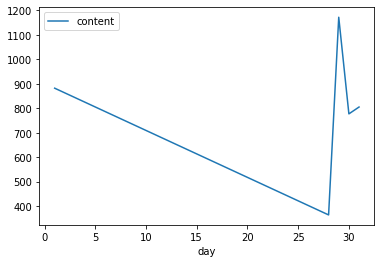

In [74]:
tweets_rt_by_day = df[['content']].groupby(df['day']).count()
tweets_rt_by_day.plot()

##Como Guardar los tuits en un dataframe

In [75]:
path=''

In [76]:
df.to_csv(path+'busqueda.csv')